# Apriori Algorithm

#### Association rule mining algorithms such as Apriori are very useful for finding simple associations between our data items. They are easy to implement and have high explain-ability. However for more advanced insights, such those used by Google or Amazon etc., more complex algorithms, such as recommender systems, are used. However, you can probably see that this method is a very simple way to get basic associations if that's all your use-case needs.

## Import the Libraries
The first step, as always, is to import the required libraries. Execute the following script to do so:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset

In [3]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header= None)

In [4]:
data.shape

(7501, 20)

### Let's call the head() function to see how the dataset looks:

In [5]:
data.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### WordCloud visualization

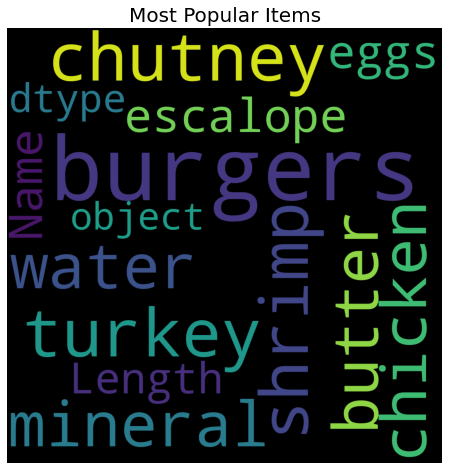

In [6]:
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (8, 8)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

### Looking at the frequency of most popular items 

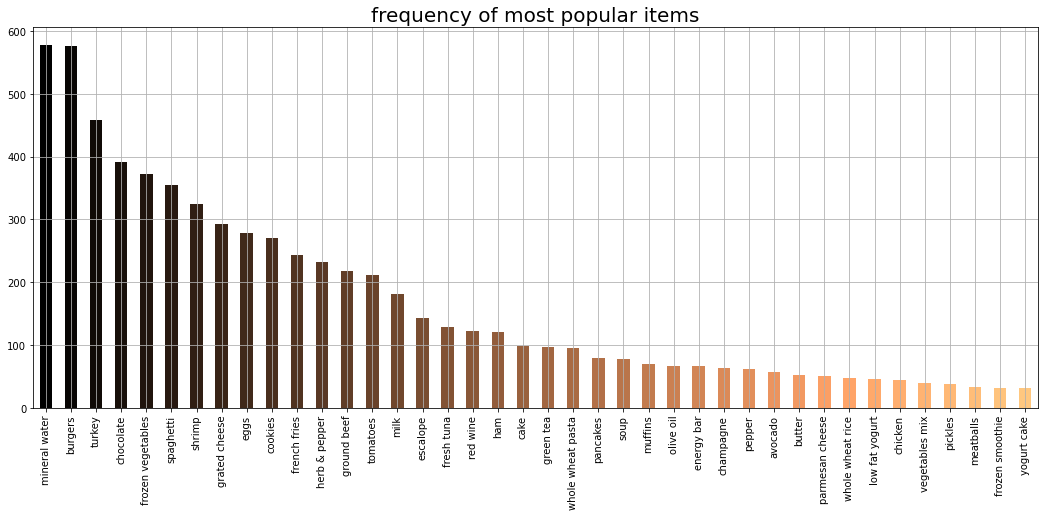

In [7]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

## Data Proprocessing

In [8]:
transactions=[]
for i in range(7501):
    transactions.append([str(data.values[i,j]) for j in range(20)])
    

### Import the apriori

In [9]:
from apyori import apriori

##### Support(B) = (Transactions containing (B))/(Total Transactions)
##### Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)
##### Lift(A→B) = (Confidence (A→B))/(Support (B))

In [10]:
rules = apriori(transactions, min_support= 0.003, min_confidence= 0.2, min_lift=5, min_length=2)

In [12]:
results = list(rules)

### Viewing the Results

In [17]:
results[0]

RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.2450980392156863, lift=5.164270764485569)])

### The following script displays the rule, the support, the confidence, and lift for each rule in a more clear way:

In [16]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: fromage blanc -> honey
Support: 0.003332888948140248
Confidence: 0.2450980392156863
Lift: 5.164270764485569
Rule: fromage blanc -> honey
Support: 0.003332888948140248
Confidence: 0.2450980392156863
Lift: 5.1788180060756694
Rule: tomato sauce -> ground beef
Support: 0.0030662578322890282
Confidence: 0.2169811320754717
Lift: 5.535970992170453
Rule: whole wheat pasta -> mineral water
Support: 0.0038661511798426876
Confidence: 0.4027777777777778
Lift: 6.115862573099416
Rule: milk -> olive oil
Support: 0.003332888948140248
Confidence: 0.29411764705882354
Lift: 6.12826797385621
Rule: soup -> milk
Support: 0.0030662578322890282
Confidence: 0.3833333333333333
Lift: 7.987175925925926
Rule: tomato sauce -> ground beef
Support: 0.0030662578322890282
Confidence: 0.2169811320754717
Lift: 5.535970992170453
Rule: whole wheat pasta -> nan
Support: 0.0038661511798426876
Confidence: 0.4027777777777778
Lift: 6.128267973856209
Rule: mineral water -> milk
Support: 0.003332888948140248
Confidence: 0.2